In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

In [69]:
palne_df = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/example/0.0.1 PULLS/palne.csv')
zapravki_df = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/example/0.0.1 PULLS/zapravki.csv')
obslug1_df = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/example/0.0.1 PULLS/obslug1.csv')
obslug2_df = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/example/0.0.1 PULLS/obslug2.csv')

In [70]:
merge_obslug = pd.concat([obslug1_df, obslug2_df], ignore_index=True)
merge_df = pd.merge(merge_obslug, zapravki_df, on='zapravka_id')
merge_all_df = pd.merge(merge_df, palne_df, on='palne_name', how='left')
merge_all_df

,zapravka_id,date,palne_name,litr,city_name,palne_id,price_by_litr
0,1,2023-12-11,PULLS_Diesel,1,Lviv,2,30
1,1,2023-12-19,PULLS_95,1,Lviv,1,50
2,2,2023-12-18,Konor,2,Kyiv,5,53
3,2,2023-12-09,PULLS_Diesel,2,Kyiv,2,30
4,3,2023-12-11,Limma,5,Lviv,4,80
5,3,2023-12-11,WOG,5,Lviv,3,39
6,4,2023-12-07,WOG,6,Dnipro,3,39
7,4,2023-12-17,Limma,6,Dnipro,4,80
8,5,2023-12-23,PULLS_95,3,Lviv,1,50
9,5,2023-12-20,Konor,3,Lviv,5,53


In [71]:
merge_all_df['total'] = merge_all_df['price_by_litr'] * merge_all_df['litr']
total_coast_df = merge_all_df.groupby(['zapravka_id', 'city_name'])['total'].sum()
total_coast_df.to_frame()


,,total
zapravka_id,city_name,
1,Lviv,80
2,Kyiv,166
3,Lviv,595
4,Dnipro,714
5,Lviv,309


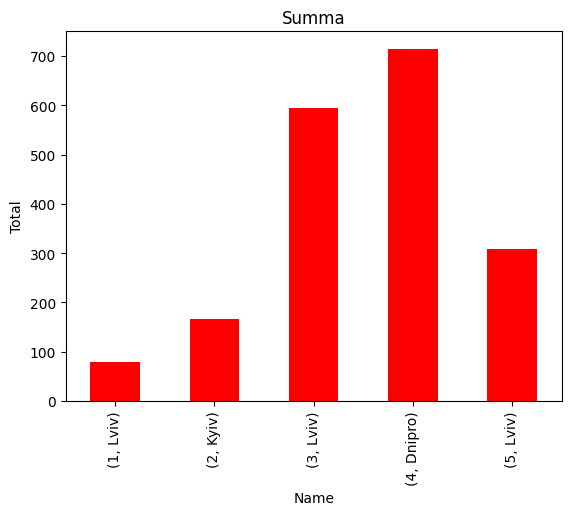

In [72]:
plt.figure()
total_coast_df.plot(kind='bar', color='red')
plt.title('Summa')
plt.xlabel('Name')
plt.ylabel('Total')

plt.show()

In [74]:
start_time = widgets.DatePicker(description='Start time', value = pd.to_datetime(merge_all_df['date']).min())
end_time = widgets.DatePicker(description='End time', value = pd.to_datetime(merge_all_df['date']).max())

output = widgets.Output()
merge_all_df['date'] = pd.to_datetime(merge_all_df['date'])
selected_date_df = merge_all_df[(merge_all_df['date'] >= start_time.value) & (merge_all_df['date'] <= end_time.value)]

sum_df = selected_date_df.groupby(['city_name', 'palne_name']).agg({'litr': 'sum', 'price_by_litr' : 'mean'}).reset_index()
sum_df['totat_by_time'] = sum_df['litr'] * sum_df['price_by_litr']

display(start_time, end_time, sum_df)
display(output)

DatePicker(value=Timestamp('2023-12-07 00:00:00'), description='Start time', step=1)

DatePicker(value=Timestamp('2023-12-23 00:00:00'), description='End time', step=1)

,city_name,palne_name,litr,price_by_litr,totat_by_time
0,Dnipro,Limma,6,80.0,480.0
1,Dnipro,WOG,6,39.0,234.0
2,Kyiv,Konor,2,53.0,106.0
3,Kyiv,PULLS_Diesel,2,30.0,60.0
4,Lviv,Konor,3,53.0,159.0
5,Lviv,Limma,5,80.0,400.0
6,Lviv,PULLS_95,4,50.0,200.0
7,Lviv,PULLS_Diesel,1,30.0,30.0
8,Lviv,WOG,5,39.0,195.0


Output()

In [ ]:
merge_all_df['date'] = pd.to_datetime(merge_all_df['date'])
             
output = widgets.Output()

time = list(merge_all_df['date'].unique())
time_dropdown = widgets.Dropdown(options=time, description='Choose')

city = list(merge_all_df['city_name'].unique())
city_dropdown = widgets.Dropdown(options=city, description='Choose')

def total_pay(selected_city, selected_date):
    selected_city = city_dropdown.value
    selected_date = pd.to_datetime(time_dropdown.value)
    
    selected_data = merge_all_df[(merge_all_df['city_name'] == selected_city) & (merge_all_df['date'] == selected_date)]
    total_payment = (selected_data['litr'] * selected_data['price_by_litr']).sum()

    with output:
        output.clear_output()
        print(f"Total payment for {selected_city} on {selected_date}: {total_payment}")

widgets.interactive(total_pay, selected_city=city_dropdown, selected_date=time_dropdown)
display(time_dropdown, city_dropdown)
display(output)

In [96]:
summ = merge_all_df[merge_all_df['palne_name'] == 'PULLS_95']['litr'].sum() 
summ2 = merge_all_df[merge_all_df['palne_name'] == 'PULLS_Diesel']['litr'].sum()

print(f"Na drony: {(summ * 1) + (summ2 *1)} hrn")

Na drony: 7 hrn
